## Session 3 Homework
Understanding Logistic Regression

In [207]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# get and load data
df = pd.read_csv('housing.csv')

In [209]:
df.sample(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7682,-118.10,33.93,33.0,1474.0,325.0,1205.0,335.0,3.1397,166800.0,<1H OCEAN
12472,-121.47,38.58,44.0,2092.0,555.0,878.0,528.0,1.5922,115100.0,INLAND
3711,-118.40,34.20,13.0,4859.0,1293.0,3351.0,1200.0,3.6875,211900.0,<1H OCEAN
6640,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,162500.0,<1H OCEAN
3229,-119.64,36.31,27.0,1513.0,314.0,1071.0,284.0,1.5909,50100.0,INLAND
5817,-118.24,34.13,45.0,1971.0,439.0,1245.0,430.0,4.0272,260500.0,<1H OCEAN
5851,-118.32,34.18,44.0,1594.0,389.0,832.0,340.0,3.4000,212100.0,<1H OCEAN
14301,-117.14,32.72,43.0,1073.0,344.0,660.0,279.0,2.0529,168800.0,NEAR OCEAN


### Data preparation

The column headers are properly sorted but let's convert all string data to lower case to ensure uniformity

In [210]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10894,-117.86,33.72,37.0,1429.0,428.0,2089.0,399.0,3.4130,150600.0,<1H OCEAN
20520,-121.53,38.58,35.0,1316.0,321.0,732.0,336.0,2.1213,79200.0,INLAND
15177,-117.07,33.04,4.0,2271.0,578.0,926.0,391.0,3.6437,210100.0,<1H OCEAN
615,-122.16,37.73,52.0,2260.0,416.0,994.0,412.0,4.1164,198200.0,NEAR BAY
3777,-118.40,34.17,24.0,4443.0,1283.0,2421.0,1180.0,2.2652,269200.0,<1H OCEAN


In [211]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

In [212]:
df = df[features]

In [213]:
df.sample(10)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7063,33.94,-118.03,37.0,1699.0,302.0,889.0,271.0,4.3542,179800.0,<1H OCEAN
9294,38.00,-122.51,17.0,2449.0,536.0,1157.0,543.0,3.9519,274200.0,NEAR BAY
10722,33.63,-117.80,8.0,32.0,9.0,26.0,11.0,4.1944,270800.0,<1H OCEAN
10019,39.19,-121.18,16.0,1528.0,351.0,729.0,319.0,2.4688,138800.0,INLAND
15179,33.03,-117.08,17.0,987.0,142.0,463.0,152.0,5.8747,229300.0,<1H OCEAN
19190,38.44,-122.68,29.0,2796.0,588.0,1346.0,562.0,2.9107,169700.0,<1H OCEAN
17190,37.24,-122.27,30.0,2762.0,593.0,1581.0,502.0,5.1002,319400.0,NEAR OCEAN
16087,37.73,-122.48,38.0,3195.0,828.0,2410.0,778.0,3.1359,350000.0,NEAR OCEAN
19386,37.77,-120.85,37.0,1738.0,403.0,936.0,366.0,2.4717,77100.0,INLAND
18629,37.10,-121.90,23.0,1708.0,287.0,670.0,238.0,6.4517,356600.0,<1H OCEAN


In [214]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [215]:
df = df.fillna(0)

In [216]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [217]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['total_rooms'] / df['households']

In [218]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,6.984127
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,6.238137
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,8.288136
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,5.817352
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,6.281853


### Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

In [219]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [220]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

**From the above we can see that `<1H OCEAN` is the most frequent observation (mode) for the column `ocean_proximity`**

### Question 2 

In [221]:
df.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [222]:
numerical = list(df.dtypes[df.dtypes == 'float64'].index)
numerical

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [223]:
df[numerical].corr().unstack().sort_values(ascending=False)

latitude                  latitude                    1.000000
longitude                 longitude                   1.000000
population_per_household  rooms_per_household         1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       population_per_household    1.000000
                                                        ...   
bedrooms_per_room         population_per_household   -0.387465
                          median_income              -0.573836
median_income             bedrooms_per_room          -0.573836
longitude                 latitude                   -0.924664
latitude                  longitude                  -0.924664
Length: 144, dtype: float64

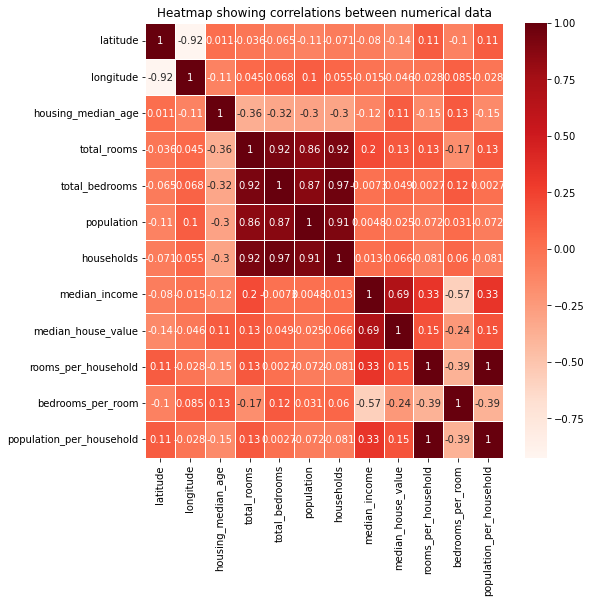

In [224]:
plt.figure(figsize=(8,8))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

**We can see it is *total_bedrooms* and *households* that have the highest correlation**

In [225]:
mean_for_house_val = df['median_house_value'].mean()
mean_for_house_val

206855.81690891474

In [226]:
df['above_average'] = (df['median_house_value'] > mean_for_house_val).astype(int)
df.sample(8)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
12302,33.92,-116.89,10.0,2653.0,621.0,1967.0,598.0,2.6643,81000.0,INLAND,4.436455,0.234075,4.436455,0
13748,34.06,-117.14,15.0,3057.0,510.0,1154.0,460.0,3.9741,141100.0,INLAND,6.645652,0.166830,6.645652,0
4181,34.09,-118.23,41.0,438.0,201.0,690.0,161.0,2.0476,181300.0,<1H OCEAN,2.720497,0.458904,2.720497,0
16720,35.46,-120.64,6.0,5876.0,1406.0,2877.0,1304.0,2.5437,146400.0,<1H OCEAN,4.506135,0.239278,4.506135,0
2036,36.75,-119.69,6.0,1926.0,303.0,965.0,316.0,4.7463,93100.0,INLAND,6.094937,0.157321,6.094937,0
12736,38.59,-121.34,22.0,3273.0,480.0,1151.0,463.0,8.0500,380000.0,INLAND,7.069114,0.146654,7.069114,1
1595,37.89,-122.09,35.0,880.0,139.0,352.0,132.0,6.8686,406500.0,NEAR BAY,6.666667,0.157955,6.666667,1
17084,37.47,-122.20,37.0,1403.0,369.0,1587.0,331.0,2.8258,232800.0,NEAR BAY,4.238671,0.263008,4.238671,1


Spliting the data

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [228]:
# remove median_house_val from data frame
del df['median_house_value']

In [229]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [230]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [231]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [232]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.922460,1
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,7.564516,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,3.908012,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,5.201093,1
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,7.010127,1


In [233]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [234]:
# drop target column
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [235]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.922460
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,7.564516
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,3.908012
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,5.201093
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,7.010127


### Question 3

In [236]:
mi_score = round(mutual_info_score(df_full_train.above_average, df_full_train.ocean_proximity), 2)
mi_score

0.1

The MI Score is **0.10**

### Question 4
Train model and get val accuracy

In [237]:
# perfrom linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [238]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [239]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [240]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [241]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [242]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [243]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [244]:
model.intercept_[0]

-0.25940131073246725

In [245]:
w = model.coef_[0]
w

array([ 7.78164990e-01,  3.94748045e-03,  3.73147850e-02,  1.58380818e-01,
        9.98891934e-02,  1.22524647e+00,  5.13892925e-01, -1.77633456e+00,
        8.09139293e-02,  4.81129735e-02,  8.74013419e-01, -1.62997832e-03,
       -5.76342857e-03, -5.76342857e-03,  1.78132599e-03, -1.27028028e-04])

In [246]:
dict(zip(dv.get_feature_names_out(), w))

{'bedrooms_per_room': 0.778164990263264,
 'households': 0.003947480453347452,
 'housing_median_age': 0.03731478504452587,
 'latitude': 0.15838081836123882,
 'longitude': 0.09988919343614036,
 'median_income': 1.2252464705617867,
 'ocean_proximity=<1H OCEAN': 0.5138929251193138,
 'ocean_proximity=INLAND': -1.7763345577416463,
 'ocean_proximity=ISLAND': 0.08091392932179192,
 'ocean_proximity=NEAR BAY': 0.048112973503522574,
 'ocean_proximity=NEAR OCEAN': 0.8740134190646576,
 'population': -0.0016299783238169347,
 'population_per_household': -0.005763428570314276,
 'rooms_per_household': -0.005763428570314276,
 'total_bedrooms': 0.0017813259854581424,
 'total_rooms': -0.00012702802804524167}

In [248]:
y_pred = model.predict_proba(X_val)[:, 1]

In [249]:
above_average = (y_pred >= 0.5)
above_average

array([False, False,  True, ...,  True,  True, False])

In [250]:
original_accuracy = accuracy_score(y_val, y_pred >= 0.5).round(2)
original_accuracy

0.84

The accuracy score is **0.84**

### Question 5


In [273]:
n_features = list(df.columns)[:-1]
n_features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [286]:
df_train_c = df_train.copy()
del df_train_c['ocean_proximity']

In [287]:
df_train_c.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.922460
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,7.564516
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,3.908012
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,5.201093
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,7.010127


In [288]:
train_dict_c = df_train_c.to_dict(orient='records')
dv_c = DictVectorizer(sparse=False)
X_train_c = dv_c.fit_transform(train_dict_c)

In [289]:
dv_c.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [290]:
df_val_c = df_val.copy()
del df_val_c['ocean_proximity']

In [291]:
val_dict_c = df_val_c.to_dict(orient='records')
X_val_c = dv_c.transform(val_dict_c)

In [292]:
model_c = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_c.fit(X_train_c, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [293]:
y_pred_c = model_c.predict_proba(X_val_c)[:, 1]

In [294]:
accuracy_score(y_val, y_pred_c >= 0.5).round(2)

0.82

In [301]:
def train_model(df_train, df_val, feature):
    # make a copy and delete the feature
    df_train_c = df_train.copy()
    del df_train_c[feature]
    
    # convert to dictionaries
    train_dict_c = df_train_c.to_dict(orient='records')
    dv_c = DictVectorizer(sparse=False)
    X_train_c = dv_c.fit_transform(train_dict_c)
    
    df_val_c = df_val.copy()
    del df_val_c[feature]
    
    val_dict_c = df_val_c.to_dict(orient='records')
    X_val_c = dv_c.transform(val_dict_c)
    
    model_c = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model_c.fit(X_train_c, y_train)
    
    y_pred_c = model_c.predict_proba(X_val_c)[:, 1]
    score = accuracy_score(y_val, y_pred_c >= 0.5).round(2)
    print("{} has an accuracy of {}".format(feature, score) )
    difference = score - original_accuracy
    return difference

In [302]:
for feature in n_features:
    score = train_model(df_train, df_val, feature)
    print('Feature "{}" has been removed accuracy of model is now = {}'.format(feature, score.round(4)))

latitude has an accuracy of 0.84
Feature "latitude" has been removed accuracy of model is now = 0.0
longitude has an accuracy of 0.83
Feature "longitude" has been removed accuracy of model is now = -0.01
housing_median_age has an accuracy of 0.83
Feature "housing_median_age" has been removed accuracy of model is now = -0.01
total_rooms has an accuracy of 0.84
Feature "total_rooms" has been removed accuracy of model is now = 0.0
total_bedrooms has an accuracy of 0.84
Feature "total_bedrooms" has been removed accuracy of model is now = 0.0
population has an accuracy of 0.82
Feature "population" has been removed accuracy of model is now = -0.02
households has an accuracy of 0.83
Feature "households" has been removed accuracy of model is now = -0.01
median_income has an accuracy of 0.79
Feature "median_income" has been removed accuracy of model is now = -0.05
ocean_proximity has an accuracy of 0.82
Feature "ocean_proximity" has been removed accuracy of model is now = -0.02
rooms_per_househ

**Excluding the last 3 features, the least is *total_rooms***

### Question 6
Train Linear Regression Model

In [303]:
# get libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [304]:
df = pd.read_csv('housing.csv')

In [305]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [306]:
df['median_house_value']=np.log1p(df['median_house_value'])
df.median_house_value

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [307]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [308]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [309]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [310]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [311]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,12.394215,<1H OCEAN
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,13.122367,NEAR OCEAN
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,11.068215,INLAND
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,12.532498,<1H OCEAN
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,12.940844,NEAR OCEAN


In [312]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [313]:
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

In [314]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [315]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [316]:
for a in  [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print('Reglarization parameter: {} and rmse is {}'.format(a, score.round(3)))
    

Reglarization parameter: 0 and rmse is 0.525
Reglarization parameter: 0.01 and rmse is 0.525
Reglarization parameter: 0.1 and rmse is 0.525
Reglarization parameter: 1 and rmse is 0.525
Reglarization parameter: 10 and rmse is 0.525


Since all of them are the same, we pick **0** 